<a href="https://colab.research.google.com/github/Remaaa17/Data_Preprocessing-ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('housing.csv')
data.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
data.shape

(20640, 10)

In [ ]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64

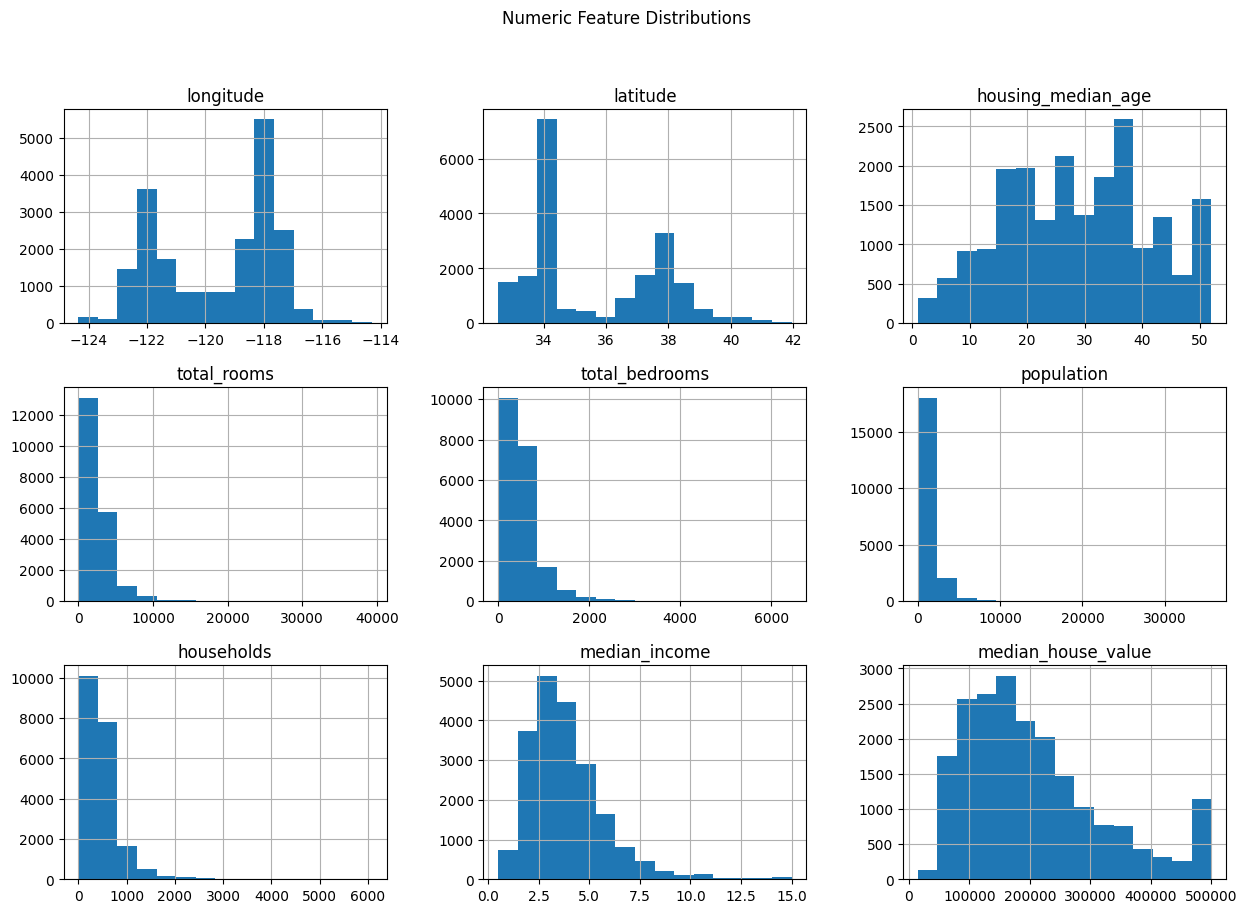

In [ ]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Numeric Feature Distributions')
plt.show()

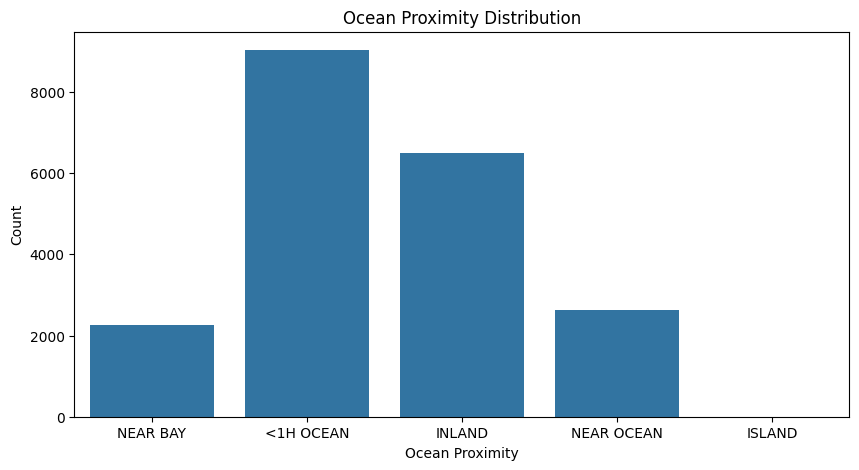

In [ ]:

# Categorical Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='ocean_proximity', data=data)
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Ocean Proximity Distribution')
plt.show()

In [ ]:
# Identify positive and negative correlations
def get_top_correlations(corr_matrix, num=5):
    corr_pairs = corr_matrix.unstack()
    sorted_pairs = corr_pairs.sort_values(kind="quicksort")
    # Exclude self correlations (correlation of a variable with itself)
    sorted_pairs = sorted_pairs[sorted_pairs != 1]
    positive_correlations = sorted_pairs[sorted_pairs > 0].tail(num)
    negative_correlations = sorted_pairs[sorted_pairs < 0].head(num)
    return positive_correlations, negative_correlations

positive_correlations, negative_correlations = get_top_correlations(correlation_matrix)

print("Top Positive Correlations:")
print(positive_correlations)
print("\nTop Negative Correlations:")
print(negative_correlations)

Top Positive Correlations:
total_rooms     households        0.918992
total_bedrooms  total_rooms       0.930380
total_rooms     total_bedrooms    0.930380
households      total_bedrooms    0.979728
total_bedrooms  households        0.979728
dtype: float64

Top Negative Correlations:
longitude                  latitude                    -0.924616
latitude                   longitude                   -0.924616
ocean_proximity_<1H OCEAN  ocean_proximity_INLAND      -0.607778
ocean_proximity_INLAND     ocean_proximity_<1H OCEAN   -0.607778
median_house_value         ocean_proximity_INLAND      -0.484787
dtype: float64


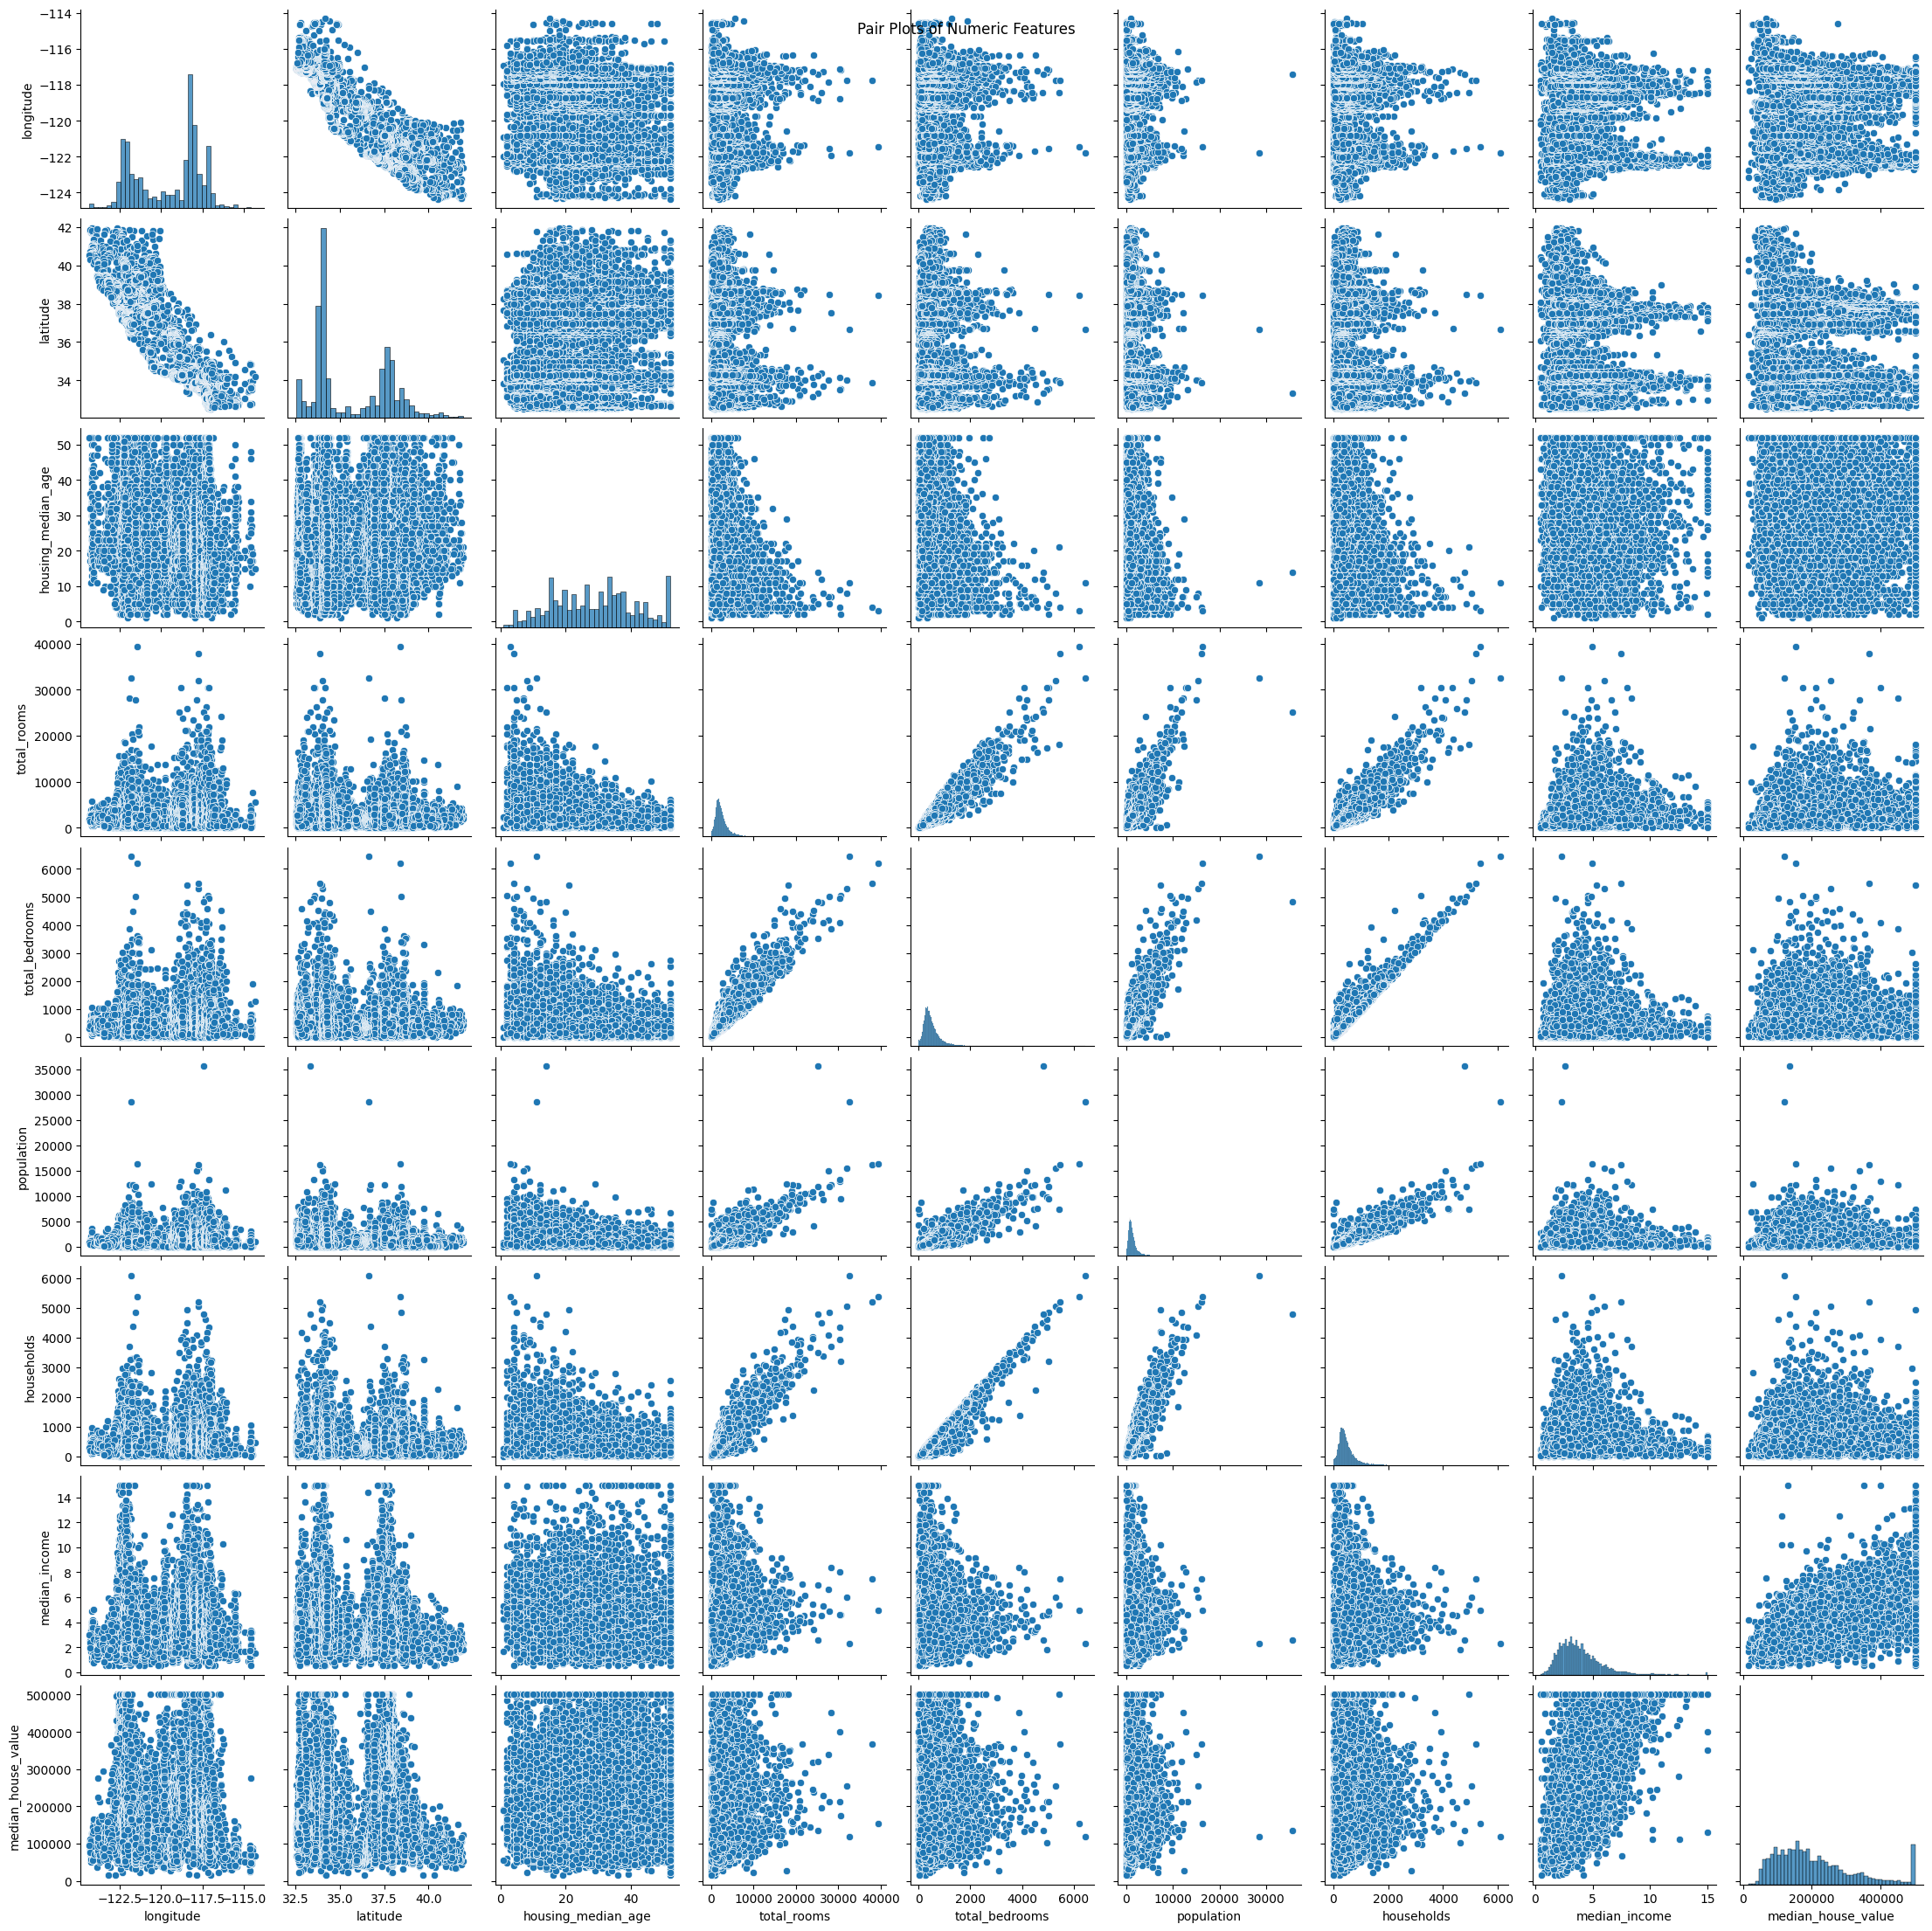

In [ ]:
# Pair Plots
sns.pairplot(data[numeric_features])
plt.suptitle('Pair Plots of Numeric Features')
plt.show()

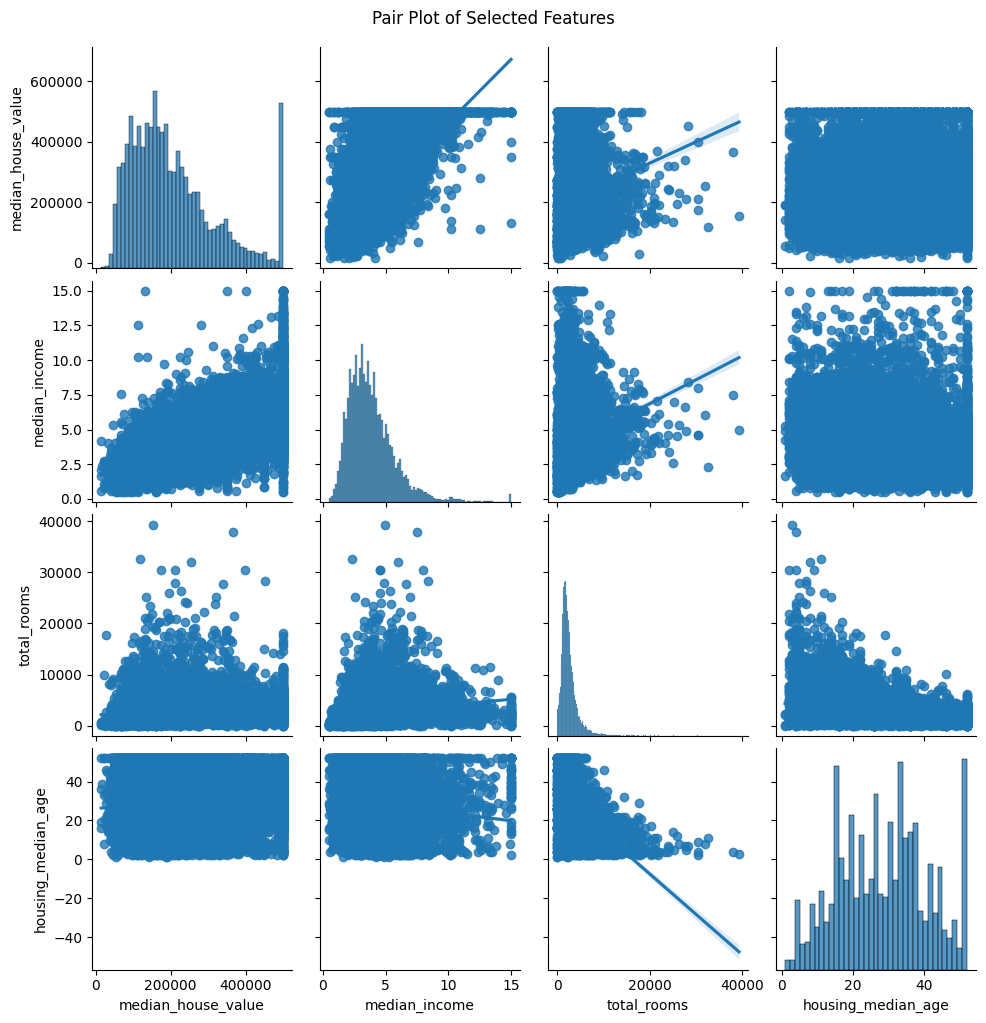

In [ ]:
import seaborn as sns

# Pairplot for selected features
sns.pairplot(data[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']], kind='reg')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


### Correlation Analysis

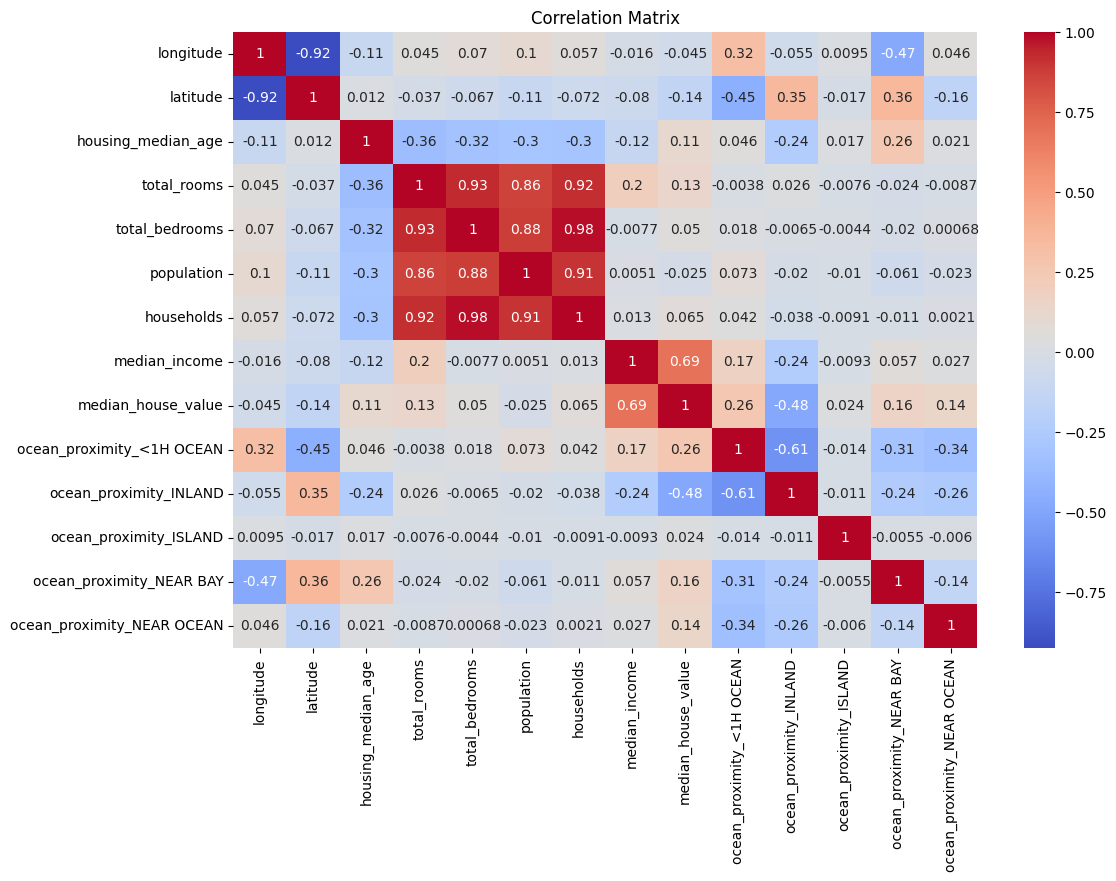

In [ ]:
# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data)

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Correlation between dependant variable and independent variables

corr_matrix = data.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value            1.000000
median_income                 0.688355
ocean_proximity_<1H OCEAN     0.257614
ocean_proximity_NEAR BAY      0.160526
ocean_proximity_NEAR OCEAN    0.140378
total_rooms                   0.133294
housing_median_age            0.106432
households                    0.064894
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023525
population                   -0.025300
longitude                    -0.045398
latitude                     -0.144638
ocean_proximity_INLAND       -0.484787
Name: median_house_value, dtype: float64

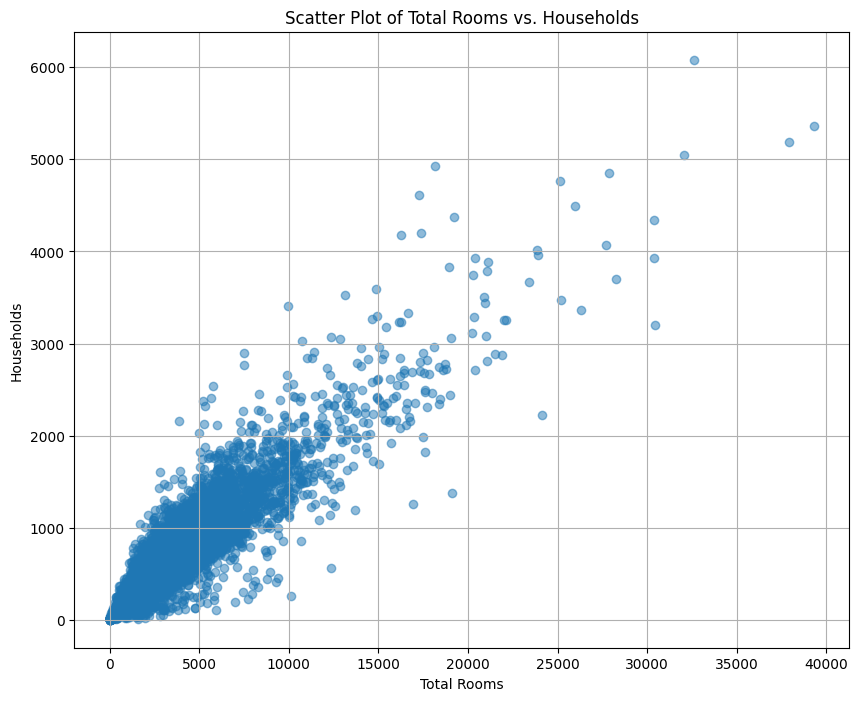

In [ ]:
import matplotlib.pyplot as plt



# Scatter plot of total_rooms vs. households
plt.figure(figsize=(10, 8))
plt.scatter(data['total_rooms'], data['households'], alpha=0.5)
plt.title('Scatter Plot of Total Rooms vs. Households')
plt.xlabel('Total Rooms')
plt.ylabel('Households')
plt.grid(True)
plt.show()


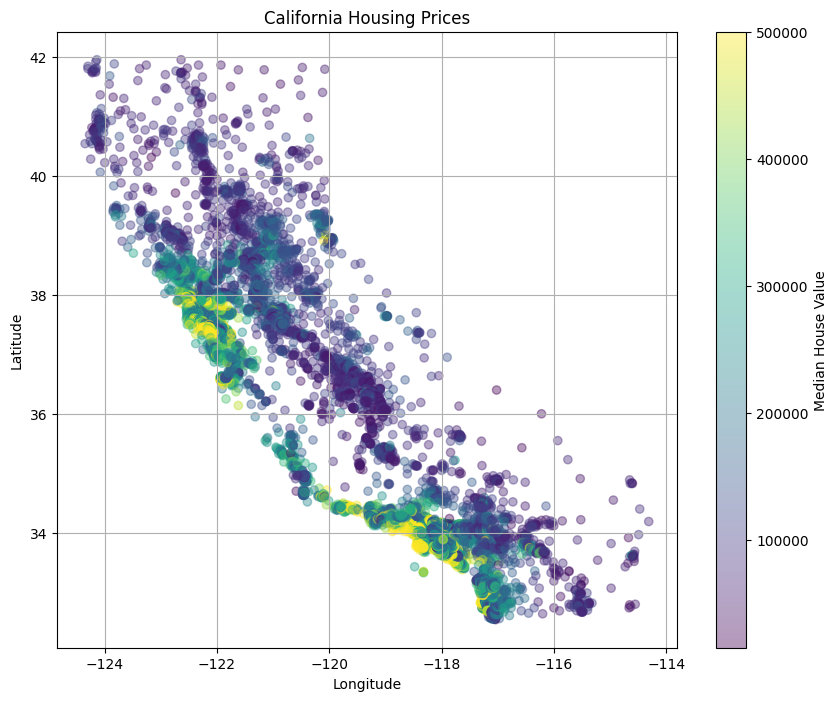

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.4, c=data['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.grid(True)
plt.show()


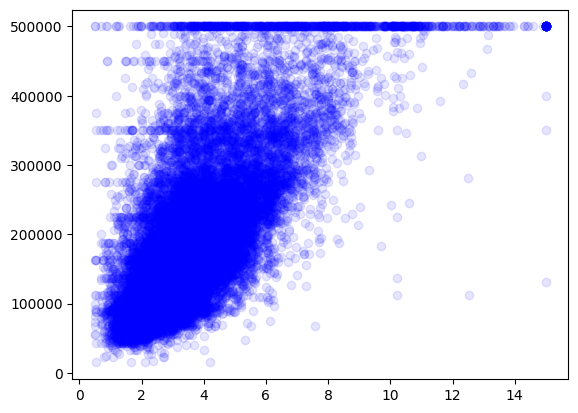

In [ ]:
# check scatter plot between median_income and median_house_value

plt.scatter(data["median_income"],data["median_house_value"], alpha=0.1,color="b")

>* **Target variable median_house_value is very mildly correlated to all but one feature median_income, so we can outline this as an important feature. The scatter plot show a strong liner relationship between the two valuables. households, Population, total_bedrooms and total_rooms appear to have very strong correlation. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. As my primary goal is to make predictions, and I don’t need to understand the role of each independent variable, I don’t need to reduce multicollinearity. longitude and latitude, they also have very strong correlation.**

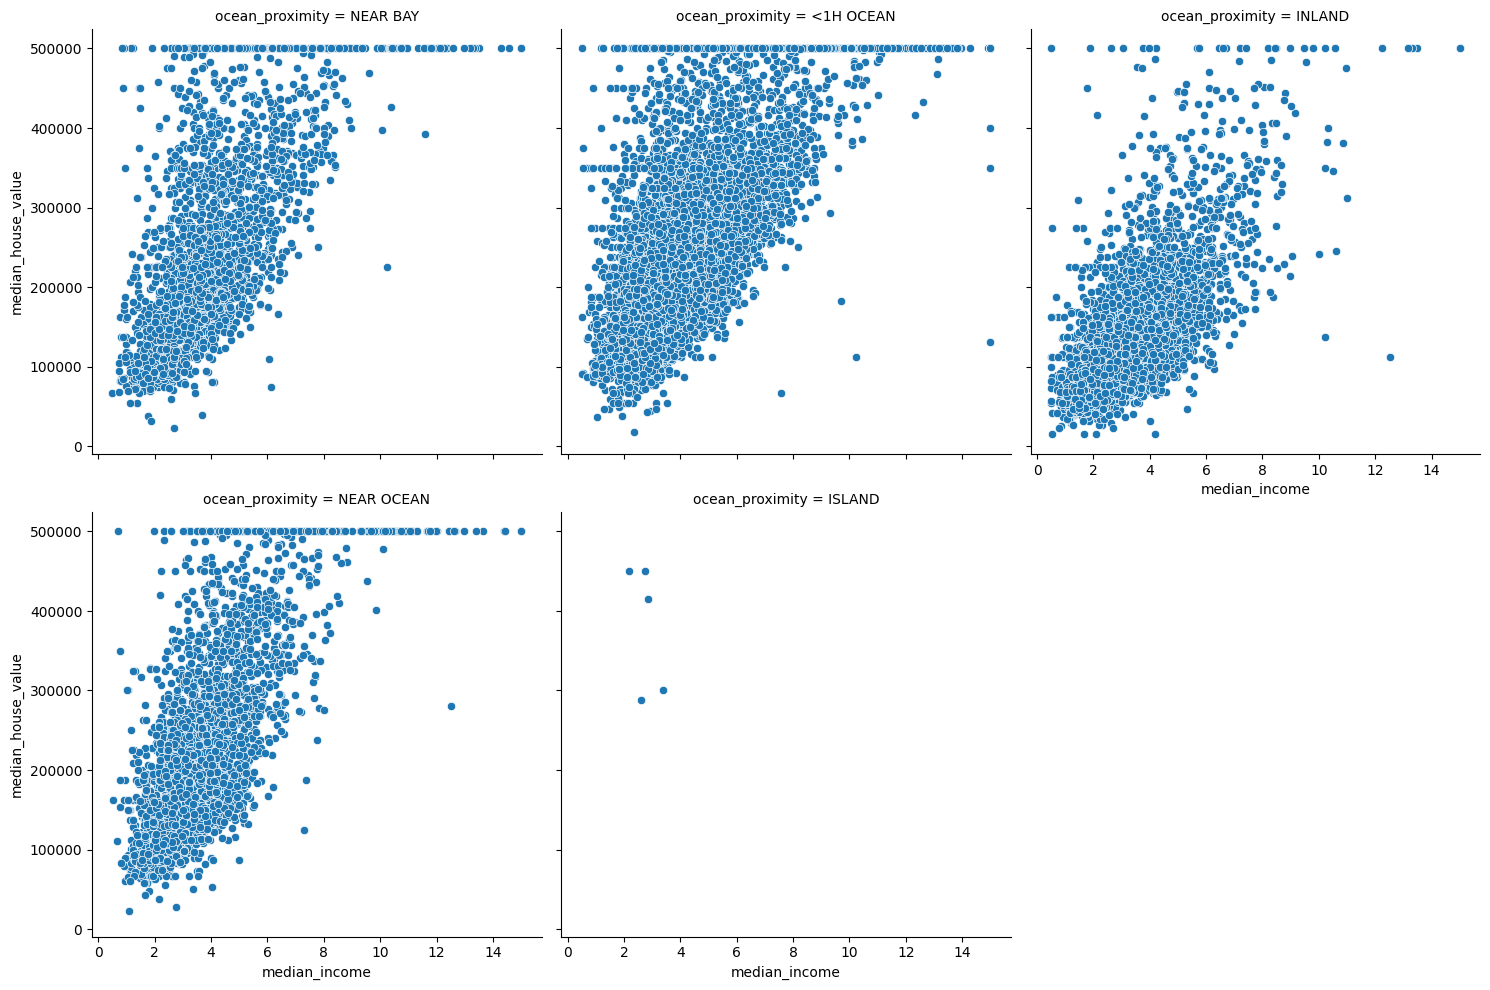

In [ ]:
# ploting between median_income and median_house_value at each ocean_proximity

sns.relplot(x=data["median_income"],y=data['median_house_value'],col=data["ocean_proximity"],col_wrap=3)
plt.show()

In [ ]:
# explore the ocean_proximity column
ocean_values = data["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

[Text(0, 0, '9034'),
 Text(0, 0, '6496'),
 Text(0, 0, '2628'),
 Text(0, 0, '2270'),
 Text(0, 0, '5')]

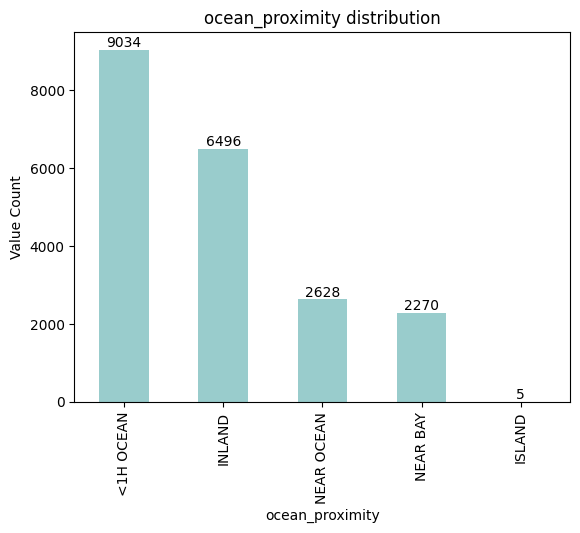

In [ ]:
# plotting the distribution of ocean_proximity column

ax = ocean_values.plot.bar(title="ocean_proximity distribution", ylabel = "Value Count" , color = "teal" ,alpha = 0.4 )

ax.bar_label(ax.containers[0])


### Handling outliers

> **median_house_value**

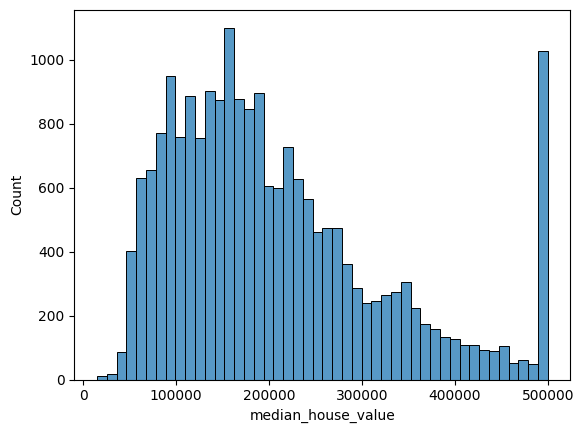

In [ ]:
# taking a closer look at target variable to handle outliers

sns.histplot(data['median_house_value'])
plt.show()

In [ ]:
house_value_q1 = data['median_house_value'].quantile(0.25)
house_value_q3 = data['median_house_value'].quantile(0.75)
house_value_iqr = house_value_q3 - house_value_q1

In [ ]:
# number of outliers
data['median_house_value'][data['median_house_value'] > house_value_q3 + (house_value_iqr * 1.5)].count()

1064

In [ ]:
data = data[data['median_house_value'] < house_value_q3 + (house_value_iqr * 1.5)]
data.shape


(19369, 10)

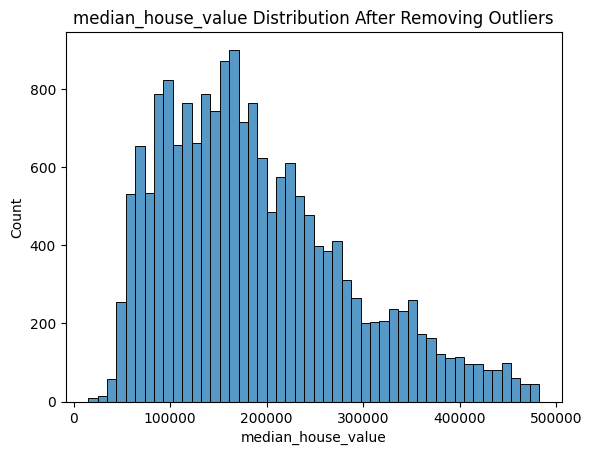

In [ ]:
# Distribtion after removing outliers

sns.histplot(data['median_house_value'])
plt.title('median_house_value Distribution After Removing Outliers')
plt.show()

>**households**

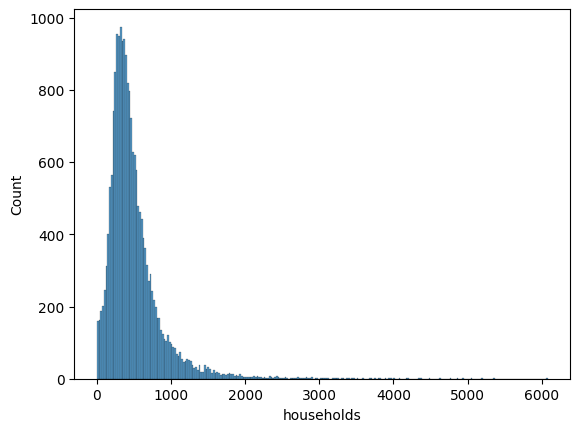

In [ ]:

# taking a closer look at households variable to handle outliers

sns.histplot(data['households'])
plt.show()

In [ ]:
households_q1 = data['households'].quantile(0.25)
households_q3 = data['households'].quantile(0.75)
households_iqr = households_q3 - households_q1

In [ ]:
# number of outliers

data['households'][data['households'] > households_q3 + households_iqr * 1.5].count()

1142

In [ ]:
data = data[data['households'] < households_q3 + households_iqr * 1.5]
data.shape

(18223, 10)

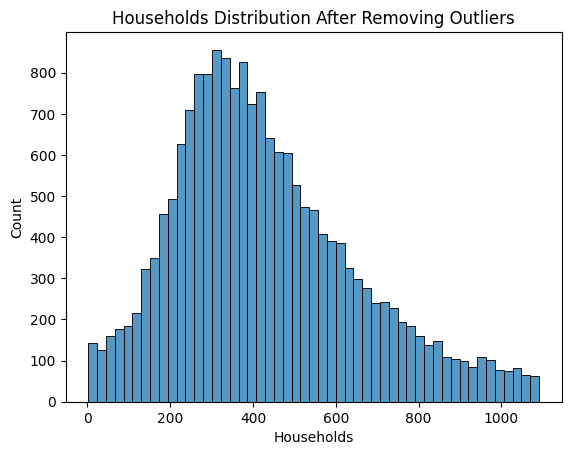

In [ ]:
sns.histplot(data['households'])
plt.title('Households Distribution After Removing Outliers')
plt.xlabel('Households')
plt.ylabel('Count')
plt.show()

>**median_income**

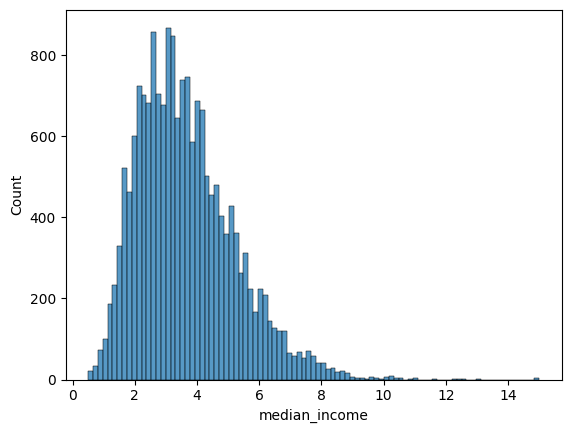

In [ ]:
sns.histplot(data['median_income'])
plt.show()

In [ ]:
median_income_q1 = data['median_income'].quantile(0.25)
median_income_q3 = data['median_income'].quantile(0.75)
median_income_iqr = median_income_q3 - median_income_q1

In [ ]:
# number of outliers

data['median_income'][data['median_income'] > median_income_q3 + median_income_iqr * 1.5].count()

326

In [ ]:
data = data[data['median_income'] < median_income_q3 + median_income_iqr * 1.5]
data.shape

(17897, 10)

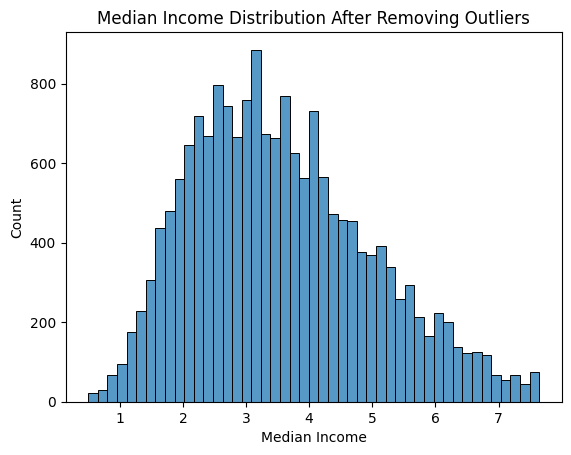

In [ ]:
sns.histplot(data['median_income'])
plt.title('Median Income Distribution After Removing Outliers')
plt.xlabel('Median Income')
plt.ylabel('Count')
plt.show()

###Encoding categorical variables

In [ ]:
## Label encode for categorical feature (ocean_proximity)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data["ocean_proximity"] = labelEncoder.fit_transform(data["ocean_proximity"])

data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17897.000000  17897.000000        17897.000000  17897.000000   
mean    -119.586941     35.682911           29.213108   2238.179471   
std        2.004455      2.161563           12.280589   1235.850961   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.940000           19.000000   1394.000000   
50%     -118.560000     34.290000           30.000000   2016.000000   
75%     -118.020000     37.740000           37.000000   2864.000000   
max     -114.310000     41.950000           52.000000  12342.000000   

       total_bedrooms    population    households  median_income  \
count    17897.000000  17897.000000  17897.000000   17897.000000   
mean       464.534615   1257.710454    432.043024       3.561192   
std        245.340537    696.032844    220.978372       1.417750   
min          2.000000      3.000000      2.000000       0.499900   
25%        291.000000    777.000000    275.000000       2.486600   
50%        420.000000   1136.000000    395.000000       3.384600   
75%        601.000000   1615.000000    560.000000       4.477700   
max       2634.000000   8733.000000   1091.000000       7.642000   

       median_house_value  ocean_proximity  
count        17897.000000     17897.000000  
mean        186256.031514         1.159636  
std          92633.492790         1.402926  
min          14999.000000         0.000000  
25%         113500.000000         0.000000  
50%         169400.000000         1.000000  
75%         240600.000000         1.000000  
max         482200.000000         4.000000

In [ ]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value  ocean_proximity  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3  
5       413.0       193.0         4.0368            269700.0                3  
6      1094.0       514.0         3.6591            299200.0                3

###Scaling Numerical Features


>>**Min-Max scaling was used to scale numerical features with huge ranges to a similar range to prevent certain features from dominating the analysis.**

In [ ]:
y = data["median_house_value"]
y

2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 17897, dtype: float64

In [ ]:
x = data.drop(["median_house_value"] , axis = 1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x)

x_scaled = scaler.transform(x)

In [ ]:
x_scaled

array([[0.21015936, 0.5642933 , 1.        , ..., 0.16069789, 0.94615029,
        0.75      ],
       [0.20916335, 0.5642933 , 1.        , ..., 0.19926538, 0.72012433,
        0.75      ],
       [0.20916335, 0.5642933 , 1.        , ..., 0.23599633, 0.46853166,
        0.75      ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.39577594, 0.16803181,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.31864096, 0.19144229,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.48484848, 0.26444603,
        0.25      ]])

In [ ]:
x_scaled = pd.DataFrame(x_scaled , columns= x.columns)

In [ ]:
x_scaled.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17897.000000  17897.000000        17897.000000  17897.000000   
mean       0.474408      0.333997            0.553198      0.181214   
std        0.199647      0.229709            0.240796      0.100150   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.257968      0.148778            0.352941      0.112804   
50%        0.576693      0.185972            0.568627      0.163209   
75%        0.630478      0.552604            0.705882      0.231929   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    17897.000000  17897.000000  17897.000000   17897.000000   
mean         0.175735      0.143724      0.394897       0.428626   
std          0.093214      0.079729      0.202919       0.198506   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.109802      0.088660      0.250689       0.278167   
50%          0.158815      0.129782      0.360882       0.403901   
75%          0.227584      0.184651      0.512397       0.556951   
max          1.000000      1.000000      1.000000       1.000000   

       ocean_proximity  
count     17897.000000  
mean          0.289909  
std           0.350731  
min           0.000000  
25%           0.000000  
50%           0.250000  
75%           0.250000  
max           1.000000

###Model Building

>>Split the dataset into 80% train and 20% test dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)